In [1]:
import pandas as pd

import torch
import numpy as np
import random

# 乱数シードを固定
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load the Excel file, skipping the first 5 rows
file_path = '/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/table/flare.xlsx'  # Update the path if necessary
df = pd.read_excel(file_path, skiprows=5)

# Extract the relevant columns
# Assuming that the date is in the first column, gas flow in the second column, and steam flow in the fourth column
date_column = df.columns[0]
gas_flow_column = df.columns[1]
steam_flow_column = df.columns[3]

# Create a new DataFrame with the extracted data
data = {
    'Date': df[date_column],
    'Gas Flow': df[gas_flow_column],
    'Steam Flow': df[steam_flow_column]
}
result_df = pd.DataFrame(data)

In [2]:
import os
def image_directory(directory_path,result_df):
    # ディレクトリ内のすべてのサブディレクトリを取得
    for subdir, _, files in os.walk(directory_path):
        for filename in files:
            if filename.lower().endswith('.jpg'):
                file_path = os.path.join(subdir, filename)
                # 画像名から日付と時間を抽出
                image_name = os.path.basename(file_path)
                date_str = image_name.split('.')[0]
                date_formatted = f"{date_str[:4]}-{date_str[5:7]}-{date_str[7:9]} {date_str[10:12]}:{date_str[12:14]}:{date_str[14:16]}"
                # 対応する行を特定
                result_df.loc[result_df['Date'] == date_formatted, 'path'] = file_path

In [3]:
image_directory('/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image',result_df)

In [4]:
# 'area' が None ではない行をフィルタリング
non_none_df = result_df[result_df['path'].notna()]


# 2024年3月1日以降のデータのみを抽出
start_date = '2024-03-01'
df = non_none_df[non_none_df['Date'] >= start_date]

In [5]:
df['Steam Flow Series'] = [None] * len(df)  # Noneで初期化
for i in range(len(df)):
    current_idx = df.index[i]
    date_current=result_df.loc[current_idx, 'Date']
    date_previous=result_df.loc[current_idx-9, 'Date']
    # 両者の時間差を計算
    time_difference = (date_current - date_previous).total_seconds() / 60  # 分単位での差
    # 10分差かどうか確認
    if abs(time_difference) == 9.0:
        previous_10_indices = result_df.index[current_idx-9:current_idx+1]  # 前10行のインデックスを取得
        previous_10_steam_flows = result_df.loc[previous_10_indices, 'Steam Flow']  # 前10行のスチーム流量を取得
        #print(previous_10_steam_flows.tolist())
        df.at[current_idx, 'Steam Flow Series']=previous_10_steam_flows.tolist() # リストに変換して保存


/var/folders/5_/fd702ty56x79nfv6cjkcb2y80000gn/T/ipykernel_18281/2736550279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Steam Flow Series'] = [None] * len(df)  # Noneで初期化


In [6]:
# セル内の最大表示文字数を制限しない
pd.set_option('display.max_colwidth', None)

In [7]:
# インデックスをリセットし、新たに idx を振り直す
df = df.reset_index(drop=True)

# フィルタリングされたデータフレームを表示
df

,Date,Gas Flow,Steam Flow,path,Steam Flow Series
0,2024-03-01 00:00:00,0.218240,13.546737,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240301/2024_0301_000000.jpg,"[13.442045211791992, 13.480429649353027, 13.466367721557617, 13.477972030639648, 13.48291301727295, 13.45733642578125, 13.459460258483887, 13.504231452941895, 13.520278930664062, 13.546736717224121]"
1,2024-03-01 00:10:00,0.220848,13.503280,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240301/2024_0301_001000.jpg,"[13.537036895751953, 13.506206512451172, 13.530599594116211, 13.533811569213867, 13.533246994018555, 13.522907257080078, 13.515458106994629, 13.526628494262695, 13.539496421813965, 13.503279685974121]"
2,2024-03-01 00:20:00,0.219022,13.534142,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240301/2024_0301_002000.jpg,"[13.523722648620605, 13.58117389678955, 13.52614974975586, 13.519680976867676, 13.519784927368164, 13.511499404907227, 13.510427474975586, 13.522750854492188, 13.511362075805664, 13.53414249420166]"
3,2024-03-01 00:30:00,0.220575,13.474668,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240301/2024_0301_003000.jpg,"[13.49030876159668, 13.50239086151123, 13.496585845947266, 13.541122436523438, 13.494206428527832, 13.424459457397461, 13.481069564819336, 13.43732738494873, 13.479488372802734, 13.4746675491333]"
4,2024-03-01 00:40:00,0.218634,13.451664,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240301/2024_0301_004000.jpg,"[13.464201927185059, 13.47219467163086, 13.467484474182129, 13.456463813781738, 13.482462882995605, 13.483731269836426, 13.459940910339355, 13.462100982666016, 13.477872848510742, 13.451663970947266]"
...,...,...,...,...,...
10363,2024-06-10 23:10:00,0.257464,12.984609,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240610/2024_0610_231000.jpg,"[13.040426254272461, 13.056936264038086, 12.971395492553711, 12.89771842956543, 12.952733993530273, 12.953988075256348, 12.987958908081055, 13.001388549804688, 12.983596801757812, 12.98460865020752]"
10364,2024-06-10 23:20:00,0.253228,12.945408,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240610/2024_0610_232000.jpg,"[13.030542373657227, 12.958428382873535, 12.980822563171387, 12.987576484680176, 13.013069152832031, 13.083436965942383, 12.972929954528809, 12.973331451416016, 12.896740913391113, 12.94540786743164]"
10365,2024-06-10 23:30:00,0.261182,13.013731,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240610/2024_0610_233000.jpg,"[13.013410568237305, 13.133139610290527, 12.996572494506836, 13.041845321655273, 13.003490447998047, 12.931336402893066, 12.938396453857422, 12.93371868133545, 12.992355346679688, 13.013731002807617]"
10366,2024-06-10 23:40:00,0.252889,12.987830,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20240610/2024_0610_234000.jpg,"[12.997912406921387, 13.100732803344727, 13.022139549255371, 12.912755966186523, 12.868654251098633, 12.954682350158691, 13.0670166015625, 13.056071281433105, 13.005434036254883, 12.98783016204834]"


In [8]:
# 2023年11月30日までのデータのみを抽出
end_date = '2023-12-01'
df2 = non_none_df[non_none_df['Date'] <= end_date]

In [9]:
df2['Steam Flow Series'] = [None] * len(df2)  # Noneで初期化
for i in range(len(df2)):
    current_idx = df2.index[i]
    date_current=result_df.loc[current_idx, 'Date']
    date_previous=result_df.loc[current_idx-9, 'Date']
    # 両者の時間差を計算
    time_difference = (date_current - date_previous).total_seconds() / 60  # 分単位での差
    # 10分差かどうか確認
    if abs(time_difference) == 9.0:
        previous_10_indices = result_df.index[current_idx-9:current_idx+1]  # 前10行のインデックスを取得
        previous_10_steam_flows = result_df.loc[previous_10_indices, 'Steam Flow']  # 前10行のスチーム流量を取得
        #print(previous_10_steam_flows.tolist())
        df2.at[current_idx, 'Steam Flow Series']=previous_10_steam_flows.tolist() # リストに変換して保存


/var/folders/5_/fd702ty56x79nfv6cjkcb2y80000gn/T/ipykernel_18281/673795684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Steam Flow Series'] = [None] * len(df2)  # Noneで初期化


In [10]:
# インデックスをリセットし、新たに idx を振り直す
df2 = df2.reset_index(drop=True)

# フィルタリングされたデータフレームを表示
df2

,Date,Gas Flow,Steam Flow,path,Steam Flow Series
0,2023-10-25 15:00:00,0.297466,5.115461,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231025/2023_1025_150000.jpg,"[5.179920196533203, 5.1403398513793945, 5.1685614585876465, 5.158380031585693, 5.213112831115723, 5.082596778869629, 5.17347526550293, 5.20166540145874, 5.1209869384765625, 5.115461349487305]"
1,2023-10-25 15:10:00,0.298861,5.006025,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231025/2023_1025_151000.jpg,"[5.195283889770508, 5.134271144866943, 5.093303680419922, 5.196503162384033, 5.101146697998047, 5.187780380249023, 5.142195701599121, 5.12172794342041, 5.193510055541992, 5.006025314331055]"
2,2023-10-25 15:20:00,0.295851,4.835564,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231025/2023_1025_152000.jpg,"[5.137470245361328, 5.242644309997559, 5.087971210479736, 5.162899017333984, 5.164128303527832, 5.160429000854492, 5.170376777648926, 5.0245490074157715, 5.232969284057617, 4.835563659667969]"
3,2023-10-25 15:30:00,0.297528,5.010692,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231025/2023_1025_153000.jpg,"[5.14542293548584, 4.860717296600342, 5.11735200881958, 5.173848628997803, 5.008265495300293, 5.151893138885498, 5.126527786254883, 5.128264904022217, 5.176971912384033, 5.010692119598389]"
4,2023-10-25 15:40:00,0.291443,5.127869,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231025/2023_1025_154000.jpg,"[5.251224994659424, 5.152080535888672, 5.182993412017822, 5.028829097747803, 5.156079292297363, 5.070023536682129, 5.1626362800598145, 5.121690273284912, 5.1875715255737305, 5.12786865234375]"
...,...,...,...,...,...
5230,2023-11-30 23:10:00,0.239181,12.226214,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231130/2023_1130_231000.jpg,"[12.330852508544922, 12.318766593933105, 12.330150604248047, 12.257339477539062, 12.270934104919434, 12.37385082244873, 12.376056671142578, 12.3937349319458, 12.481514930725098, 12.226214408874512]"
5231,2023-11-30 23:20:00,0.235349,12.249908,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231130/2023_1130_232000.jpg,"[12.316650390625, 12.313802719116211, 12.293349266052246, 12.282855987548828, 12.317788124084473, 12.307693481445312, 12.32931900024414, 12.380952835083008, 12.294377326965332, 12.249908447265625]"
5232,2023-11-30 23:30:00,0.235787,12.285759,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231130/2023_1130_233000.jpg,"[12.288932800292969, 12.312589645385742, 12.319890975952148, 12.331151008605957, 12.338367462158203, 12.326165199279785, 12.255097389221191, 12.246015548706055, 12.277457237243652, 12.285758972167969]"
5233,2023-11-30 23:40:00,0.235101,12.309461,/Users/watanabeyuu/Documents/仮想環境1/env/eneos/20240627_フレア流量ENEOS追加データ/image/20231130/2023_1130_234000.jpg,"[12.292637825012207, 12.357454299926758, 12.324674606323242, 12.273876190185547, 12.27740478515625, 12.295055389404297, 12.349899291992188, 12.349830627441406, 12.330975532531738, 12.309460639953613]"


In [11]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


class GasFlowDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df['path'].iloc[idx]
        image = Image.open(image_path).convert('RGB')  # RGBに変換

        if self.transform:
            image = self.transform(image)
        
        # スチーム流量とガス流量を取得
        steam_flow_series = torch.tensor(self.df['Steam Flow Series'].iloc[idx], dtype=torch.float32)
        gas_flow = torch.tensor(self.df['Gas Flow'].iloc[idx], dtype=torch.float32)

        return image, steam_flow_series, gas_flow, idx

# カスタム変換: 画像の右半分を切り取る
class RightHalfCrop:
    def __call__(self, img):
        width, height = img.size
        left = width // 2  # 右半分を開始する位置
        return img.crop((left, 0, width, height))

transform = transforms.Compose([
    RightHalfCrop(),
    transforms.Resize(128),                 # 短辺を128にリサイズ
    transforms.CenterCrop((128, 128)),      # 128x128の中心クロップ
    transforms.ToTensor(),                  # Tensorに変換
    ])

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleMultiModalNN(nn.Module):
    def __init__(self):
        super(SimpleMultiModalNN, self).__init__()
        
        # CNN部分（画像処理ネットワーク）
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc_cnn = nn.Linear(32 * 32 * 32, 32)  # 簡単化されたCNNの出力サイズに合わせる
        
        # スチーム流量処理部分（LSTM）
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, num_layers=2, batch_first=True)
        
        # 融合層（特徴の結合）
        self.fc1 = nn.Linear(32 + 32, 1)  # 融合してすぐに最終出力

    def forward(self, x, steam_flow_series):
        # CNN部分（画像処理）
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)  # Flatten
        x = F.relu(self.fc_cnn(x))
        
        # スチーム流量処理部分（LSTM）
        steam_flow_series = steam_flow_series.unsqueeze(-1)  # Batch_size x Seq_len x 1 (1はスチーム流量の特徴量数)
        lstm_out, (hn, cn) = self.lstm(steam_flow_series)  # LSTMを通過
        steam_flow_features = hn[-1]  # LSTMの最終的な隠れ状態を使用（Batch_size x hidden_size）
        
        # 特徴の結合と最終的な予測層
        x = torch.cat((x, steam_flow_features), dim=1)
        x = self.fc1(x)
        return x


Mean Squared Error on training data: 1.8190479425719421


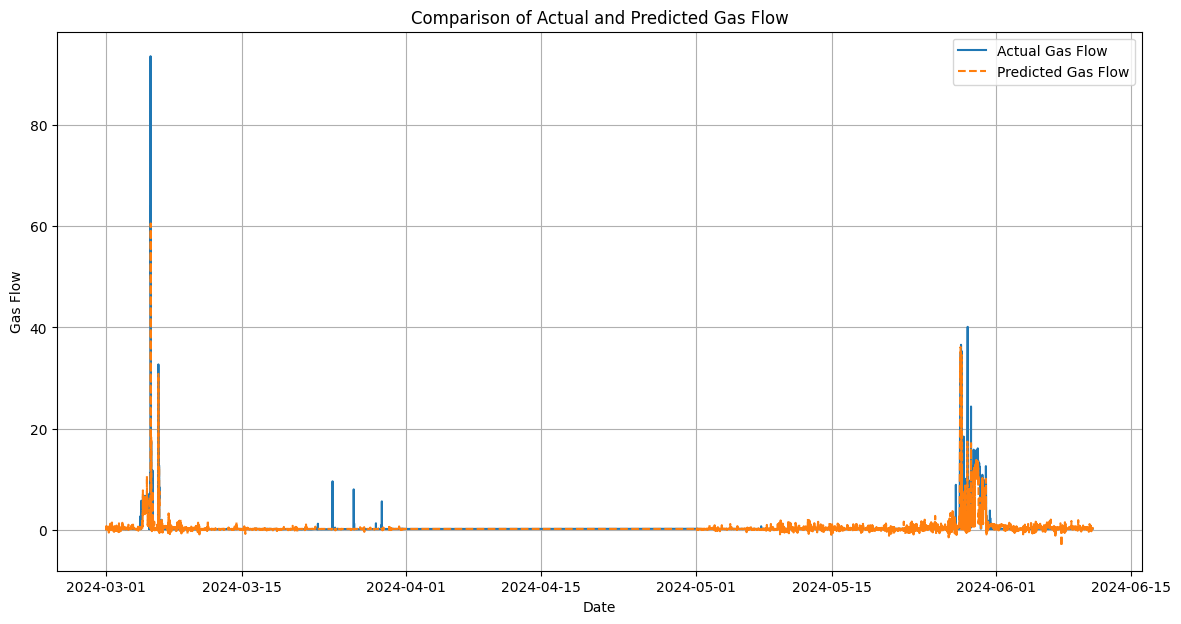

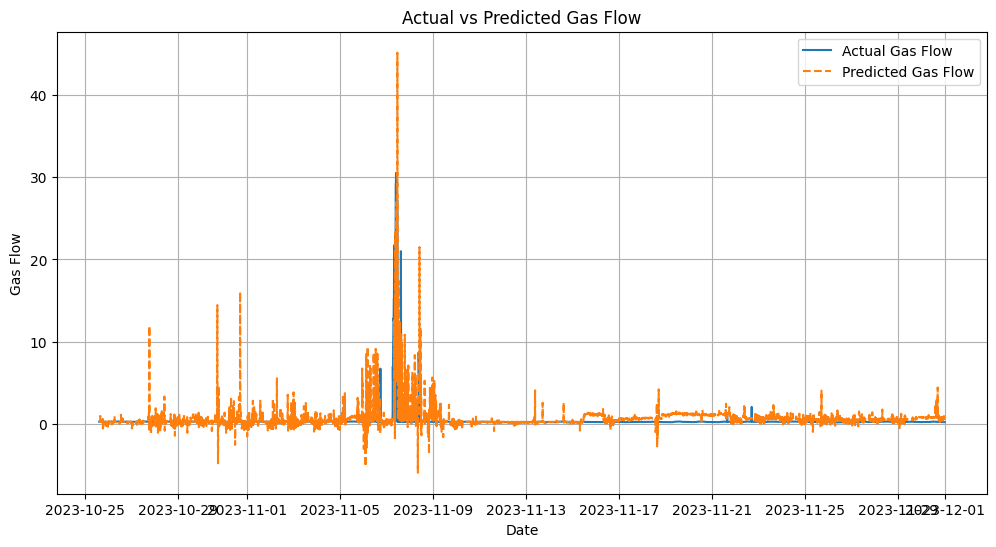

Mean Squared Error on new data: 1.9436646114064056


In [13]:
from sklearn.metrics import mean_squared_error
import torch.optim as optim
import numpy as np

dataset = GasFlowDataset(df=df, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# モデルの初期化
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleMultiModalNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# モデルの訓練
for epoch in range(50):  # エポック数は調整が必要
    model.train()
    for inputs, steam_flow_series, gas_flow, _ in data_loader:  # gas_flow を追加
        inputs, steam_flow_series, gas_flow  = inputs.to(device), steam_flow_series.to(device), gas_flow.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, steam_flow_series)
        loss = criterion(outputs.squeeze(), gas_flow)  # gas_flow を直接使用
        loss.backward()
        optimizer.step()

# モデルの評価
model.eval()
predictions = [None]*len(dataset.df)
actuals = [None]*len(dataset.df)
with torch.no_grad():
    for inputs, steam_flow_series, gas_flow ,idx in data_loader:  # gas_flow を追加
        inputs, steam_flow_series = inputs.to(device), steam_flow_series.to(device)
        outputs = model(inputs, steam_flow_series)
        for i in range(len(idx)):#len(idx)はバッチサイズ
            index=idx[i].item()#整数に変換
            predictions[index]=outputs[i].cpu().numpy()
            actuals[index]=gas_flow[i].cpu().numpy()

dataset.df['prediction'] = predictions
# 訓練データに対するMSEを計算
mse_train = mean_squared_error(df['Gas Flow'], np.array(predictions))
print(f"Mean Squared Error on training data: {mse_train}")

# 訓練データの予測結果を保存
dataset.df['prediction'] = predictions

dates = dataset.df['Date']

import matplotlib.pyplot as plt
# グラフの作成
plt.figure(figsize=(14, 7))
plt.plot(dates, dataset.df['Gas Flow'], label='Actual Gas Flow')
plt.plot(dates, dataset.df['prediction'], label='Predicted Gas Flow', linestyle='--')

# グラフの装飾
plt.xlabel('Date')
plt.ylabel('Gas Flow')
plt.title('Comparison of Actual and Predicted Gas Flow')
plt.legend()
plt.grid(True)

plt.show()

# df2のデータでの検証
dataset2 = GasFlowDataset(df=df2, transform=transform)
data_loader2 = DataLoader(dataset2, batch_size=32, shuffle=False)

# df2に対して予測を実施
predictions_df2 = []
with torch.no_grad():
    model.eval()
    for inputs, steam_flow_series, _ ,_ in data_loader2:
        inputs, steam_flow_series = inputs.to(device), steam_flow_series.to(device)
        outputs = model(inputs, steam_flow_series)
        predictions_df2.extend(outputs.cpu().numpy())

# df2に予測結果を追加
df2['prediction'] = predictions_df2

# 結果の表示
plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['Gas Flow'], label='Actual Gas Flow')
plt.plot(df2['Date'], df2['prediction'], label='Predicted Gas Flow', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Flow')
plt.title('Actual vs Predicted Gas Flow')
plt.legend()
plt.grid(True)

plt.show()

# スコアの計算
mse_new = mean_squared_error(df2['Gas Flow'], df2['prediction'])
print(f"Mean Squared Error on new data: {mse_new}")

In [14]:
df_data=df2.drop(columns='path')
df_data['prediction']=df_data['prediction'].apply(lambda x: x[0])
df_data.to_excel('/Users/watanabeyuu/Documents/仮想環境1/env/eneos/results/datacnn36.xlsx')